In [4]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../')
from fig_helpers import add_metrics_to_df, change_box_colors, make_legend
from paths import FIG_DIR, RESULTS_DIR
sns.set_style('white')

metric = 'pred_rel_prior'
# methods = [ 'observed', 'ours']
method_name_dict = {"supervised": "Supervised", "negative": "Negative", "scar-c": "SCAR-C",
                    'scar-km2': 'KM2', "sar-em": "EM", "ours": "PURPLE", 'observed': 'Observed'}

methods = ['ours']
method_colors_map = {'observed': '#4daf4a', 'ours': '#984ea3'}
method_colors = [method_colors_map[method] for method in methods]


val_loss_key = 'auprc'

box_width = .75

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# IPV application

Index(['MARRIED', 'DIVORCED', 'SINGLE'], dtype='object', name='group')
2.5
Index(['WHITE', 'BLACK/AFR', 'HISPANIC/', 'ASIAN'], dtype='object', name='group')
3.5
Index(['Medicare', 'Medicaid'], dtype='object', name='group')
1.5


<ipython-input-5-17c920516a40>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', '0.25x', '0.50x', '1.0x', '2.0x', '4.0x'])
<ipython-input-5-17c920516a40>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', '0.25x', '0.50x', '1.0x', '2.0x', '4.0x'])
<ipython-input-5-17c920516a40>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', '0.25x', '0.50x', '1.0x', '2.0x', '4.0x'])


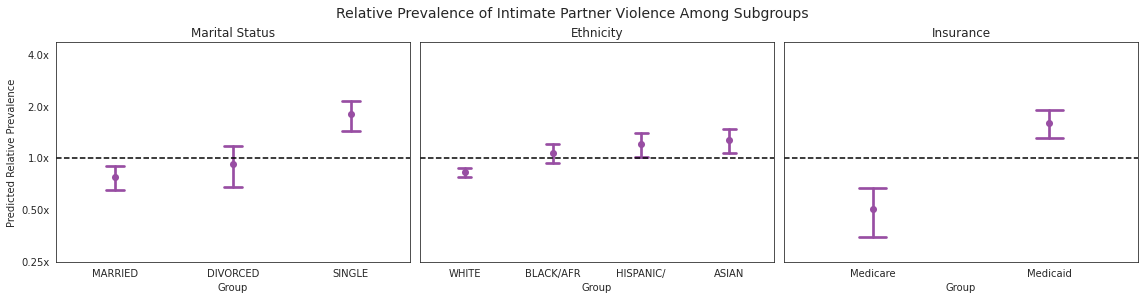

In [5]:
fig, axs = plt.subplots(1, 3, sharey=True, sharex=False, figsize=(16, 4))
categories = ['marital_status', 'ethnicity', 'insurance']
ipv_category_title_map = {'marital_status': 'Marital Status', 'ethnicity':'Ethnicity', 
                          'insurance': 'Insurance'}
for i, category in enumerate(categories):
    ax = axs[i]
    dfs = []
    for method in methods:
        df = pd.read_csv(RESULTS_DIR + "real_ipv_" + method + "_" + category + "_results_teststratified_by_none")
        if method == 'ours':
            df = df.sort_values([val_loss_key], ascending=False).groupby(['group', 'seed']).head(1)
        dfs.append(df)

    df = pd.concat(dfs).sort_values(metric)
    df['group'] = df['group'].str[:9]
    order = df.groupby(['group']).mean().sort_values(metric).index
    print(order)
    g = sns.pointplot(x='group', y=metric, hue='method', order=order, 
                      hue_order=methods, data=df, width=box_width,join=False, ci='sd',
                       palette=["#984ea3"], scale=.8,
                    ax=ax, capsize=.15)
    ax.set_ylim(.25, 4.7)
    g.set_yscale('log', base=2)

    ax.set_ylabel("")
    ax.get_legend().remove()
    if i == 0:
        ax.set_ylabel("Predicted Relative Prevalence")
#         make_legend(ax, methods, method_colors, method_name_dict)
    ax.set_title(ipv_category_title_map[category])
    ax.set_xlabel("Group")
    change_box_colors(ax, method_colors)
    x_max = len(set(df['group'])) - 1 + .5
    print(x_max)
    if metric == 'pred_rel_prior':
        ax.hlines(y=1, xmin=-.5, xmax=x_max, linestyle="--", color='black')
        ax.set_xlim(-.5, x_max)

    ax.set_yticklabels(['', '0.25x', '0.50x', '1.0x', '2.0x', '4.0x'])
plt.tight_layout()
plt.suptitle("Relative Prevalence of Intimate Partner Violence Among Subgroups", y=1.03, fontsize=14)
plt.savefig(FIG_DIR + 'ipv_rp_estimates.pdf', dpi=300)  


## Content Moderation Relative Prevalences

<ipython-input-6-b30a33805e7f>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', '.25x',  '0.5x', '1.0x', '2.0x', '4.0x'])
<ipython-input-6-b30a33805e7f>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', '.25x',  '0.5x', '1.0x', '2.0x', '4.0x'])
<ipython-input-6-b30a33805e7f>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', '.25x',  '0.5x', '1.0x', '2.0x', '4.0x'])
<ipython-input-6-b30a33805e7f>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', '.25x',  '0.5x', '1.0x', '2.0x', '4.0x'])


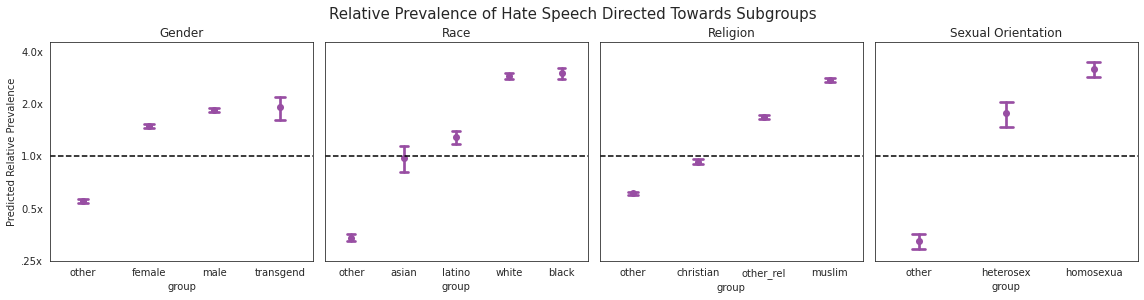

In [6]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(16, 4), sharex=False)
categories = ['gender', 'identity', 'religion', 'sexual_orientation']
category_title_map = {'gender': 'Gender', 'identity': 'Race', 'religion': 'Religion', 
                      'sexual_orientation': 'Sexual Orientation'}
for i, category in enumerate(categories):
    ax = axs[i]
    dfs = []
    for method in methods:
        df = pd.read_csv(RESULTS_DIR + "real_cmod_" + method + "_" + category + "_results")
        if method == 'ours':
            df = df.sort_values([val_loss_key], ascending=False).groupby(['group', 'seed']).head(1)
        dfs.append(df)

    df = pd.concat(dfs).sort_values(metric)
    df['group'] = df['group'].str[:9]
    order = df.groupby(['group']).mean().sort_values(metric).index
    
#     g = sns.boxplot(x='group', y=metric, hue='method', data=df, 
#                     order=order, hue_order=methods, width=box_width, ax=ax)
    
    g = sns.pointplot(x='group', y=metric, hue='method', order=order, 
                      hue_order=methods, data=df, width=box_width,join=False, ci='sd',
                      scale=.8, palette=["#984ea3"],
                    ax=ax, capsize=.15)
    
    ax.set_title(category_title_map[category])
    x_axis_max = len(set(df['group'])) - 1 + .5
    ax.get_legend().remove()
    # make_legend(ax, methods, method_colors, method_name_dict, loc='upper right')
    # ax.get_legend().remove()
    ax.set_ylabel("")
    if i == 0:
        ax.set_ylabel("Predicted Relative Prevalence")
    ax.hlines(y=1, xmin=-.5, xmax= x_axis_max, linestyle="--", color='black')
    change_box_colors(ax, method_colors)

    ax.set_xlim(-.5, x_axis_max)
    ax.set_ylim(.25, 4.5)
    g.set_yscale('log', base=2)
    ax.set_yticklabels(['', '.25x',  '0.5x', '1.0x', '2.0x', '4.0x'])

    change_box_colors(ax, method_colors)
plt.tight_layout()
plt.suptitle("Relative Prevalence of Hate Speech Directed Towards Subgroups", y=1.03, fontsize=15)
plt.savefig(FIG_DIR + 'cmod_rp_estimates.pdf', dpi=300)  
